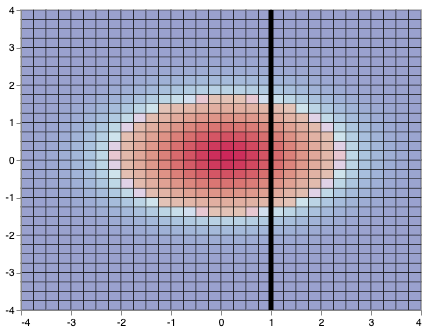

In [2]:
import altair as alt
import pandas as pd
import numpy as np
alt.data_transformers.disable_max_rows()

from scipy.stats import multivariate_normal
x, y = np.meshgrid(np.arange(-4, 4, 0.25), np.arange(-4, 4, 0.25))
rv = multivariate_normal([0,0], [[1.5,0],[0,0.7]])
z = rv.pdf(np.stack([x.ravel(), y.ravel()]).T)

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                       'y': y.ravel(),
                       'x2': x.ravel() + 0.25,
                       'y2': y.ravel() + 0.25,
                       'z': z.ravel(),
                       'x*':1})

density = alt.Chart(source).mark_rect(strokeWidth=0.5, stroke="black").encode(
    x=alt.X('x',title=None), y=alt.Y('y', title=None), 
    x2='x2', y2='y2',
    color=alt.Color('z:Q', legend=None, 
                    scale=alt.Scale(
                        domain=[0,0.025,0.03,0.11], 
                        range=['#9AA1CE', '#D1E5ED', '#E3C3B7', '#D86C6E']))
) 
rule = alt.Chart(source).mark_rule(size=5, color='black').encode(x='mean(x*)')

density + rule

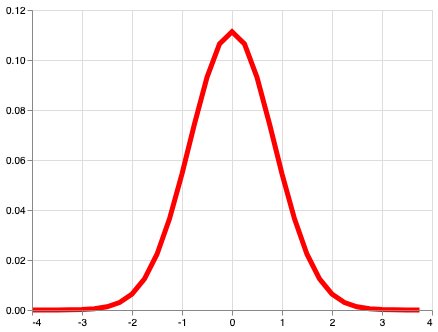

In [3]:
conditional = source.query('x==1')
alt.Chart(conditional).mark_line(color='red', size=5).encode(
    x=alt.X('y', title=None), y=alt.Y('z', title=None)
)

In [ ]:
def make_xy():
    x = 5*np.random.random()
    μ = np.sin(x)
    y = np.random.normal(μ,0.5)
    return x,y

x, y = zip(*[make_xy() for i in range(1000)])
increment = 0.5
x_axis, y_axis = [np.arange(min(v), max(v)+increment, increment) for v in (x,y)]
grid, _, _ = np.histogram2d(x, y, bins=[x_axis, y_axis])